In [2]:
import pandas as pd  # 用于数据处理
import numpy as np  # 用于数值计算
import matplotlib.pyplot as plt  # 用于绘图
import seaborn as sns  # 用于数据可视化
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer,RobustScaler, PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report





In [3]:
#1 读取数据
data=pd.read_csv('heart.csv') # 1分

In [4]:
#2 显示数据前五行
data.___2___() # 1分

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
#3 显示数据集形状（shape）
data.___3___  # 1分

(792, 12)

In [6]:
#4 检查数据中缺失值的数量
data.___4___().sum()  # 1分

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
#5 显示数据的描述性统计信息
data.___5___()  # 1分

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,53.397727,132.419192,191.157828,0.246212,134.357323,0.854419,0.566919
std,9.478015,18.847275,114.151967,0.431076,25.308560,1.043700,0.495815
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,160.000000,0.000000,117.000000,0.000000,0.000000
50%,54.000000,130.000000,219.000000,0.000000,134.000000,0.500000,1.000000
75%,60.000000,140.000000,265.000000,0.000000,152.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,195.000000,5.600000,1.000000


In [8]:
#6 检查数据中是否有重复值
data.___6___().sum() # 1分

0

In [9]:
#7 分割目标变量和特征变量
X = data.___7___("HeartDisease", axis=1)  # 特征变量 # 1分
y = data["HeartDisease"]  # 目标变量

In [10]:
#8 划分训练集和测试集
x_train, x_test, y_train, y_test = ___8___(X, y, test_size=0.2, random_state=42) # 1分


In [11]:
#9 拼接训练集的特征变量和目标变量
train_set = pd.___9___([x_train, y_train], axis=1) # 1分
train_set.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
342,61,M,ASY,110,0,1,Normal,113,N,1.4,Flat,1
244,48,M,ASY,160,268,0,Normal,103,Y,1.0,Flat,1
314,53,M,ASY,80,0,0,Normal,141,Y,2.0,Down,0
727,60,F,ASY,158,305,0,LVH,161,N,0.0,Up,1
691,45,M,ASY,104,208,0,LVH,148,Y,3.0,Flat,0


<Axes: >

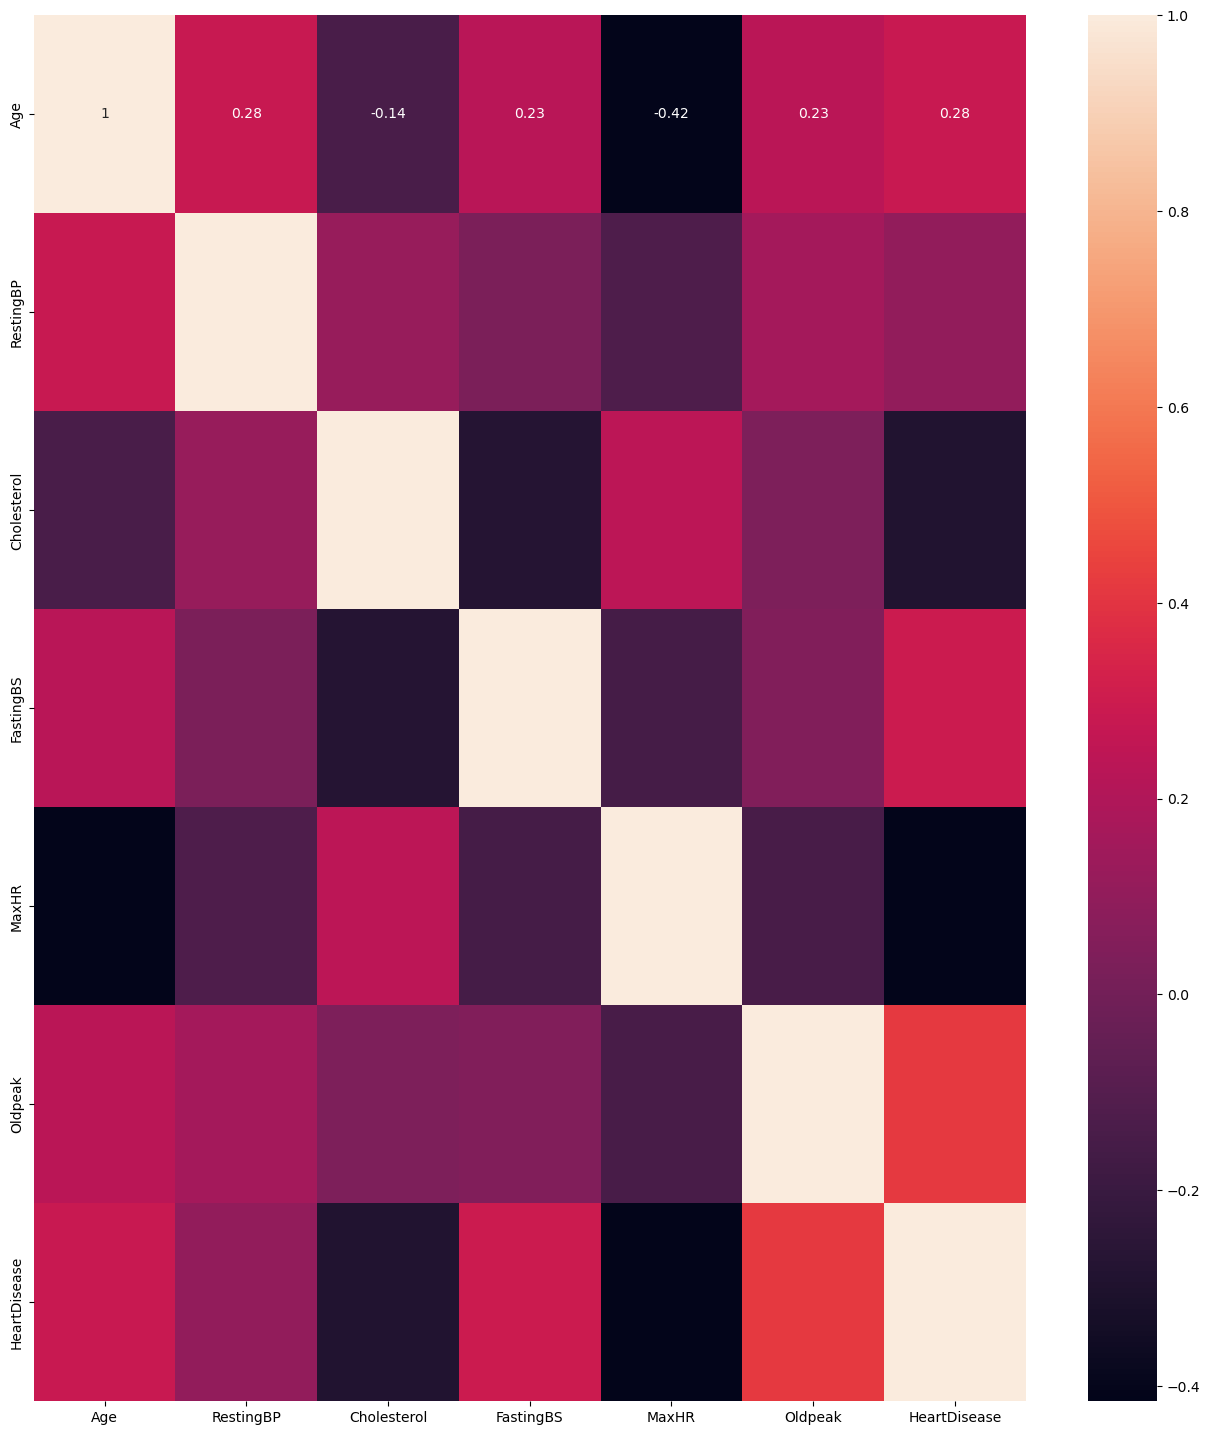

In [3]:
#10 绘制所有数值型特征的相关姓特征图
# 选择数值型特征
num = [i for i in train_set.columns if train_set[i].dtype != 'object'] 
# 绘制数值特征的相关性热图
plt.figure(figsize=(16, 18))
sns.heatmap(___10___, annot=True)  # 1分

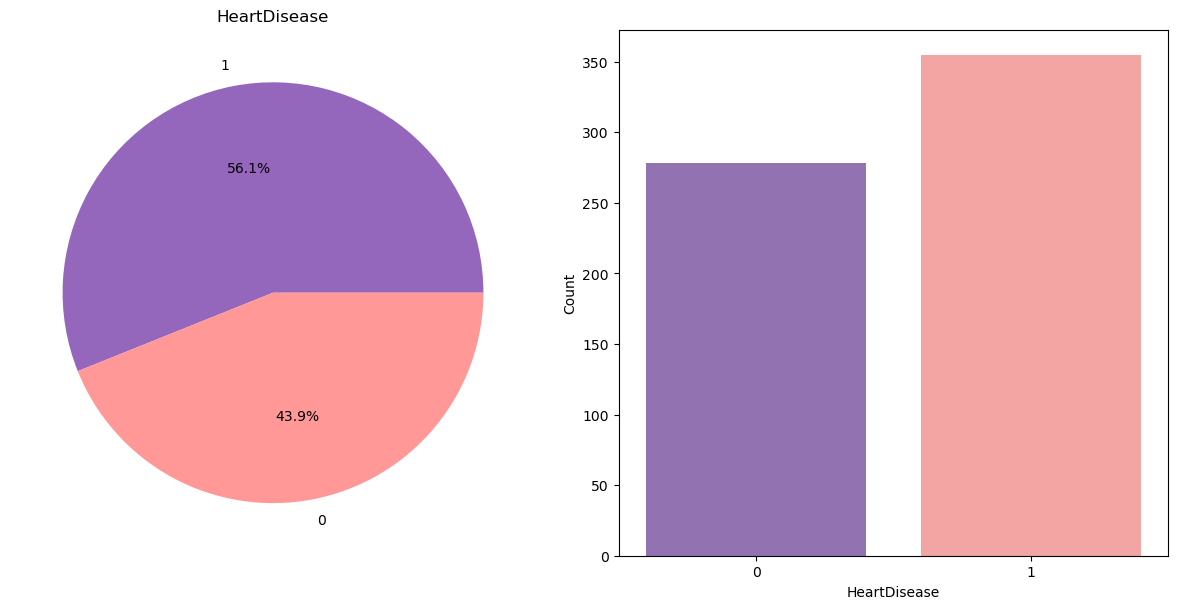

In [43]:
#11 绘制心脏病分布的饼图和计数图
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
train_set['HeartDisease'].___11___.plot(kind='pie', autopct='%1.1f%%', colors=['#9467bd', '#ff9896'], ax=axs[0]) #  1分
axs[0].set_title('HeartDisease')
axs[0].set_ylabel('')

sns.countplot(x='HeartDisease', data=train_set, palette=['#9467bd', '#ff9896'], ax=axs[1])
axs[1].set_xlabel('HeartDisease')
axs[1].set_ylabel('Count')

plt.tight_layout()  
plt.show()

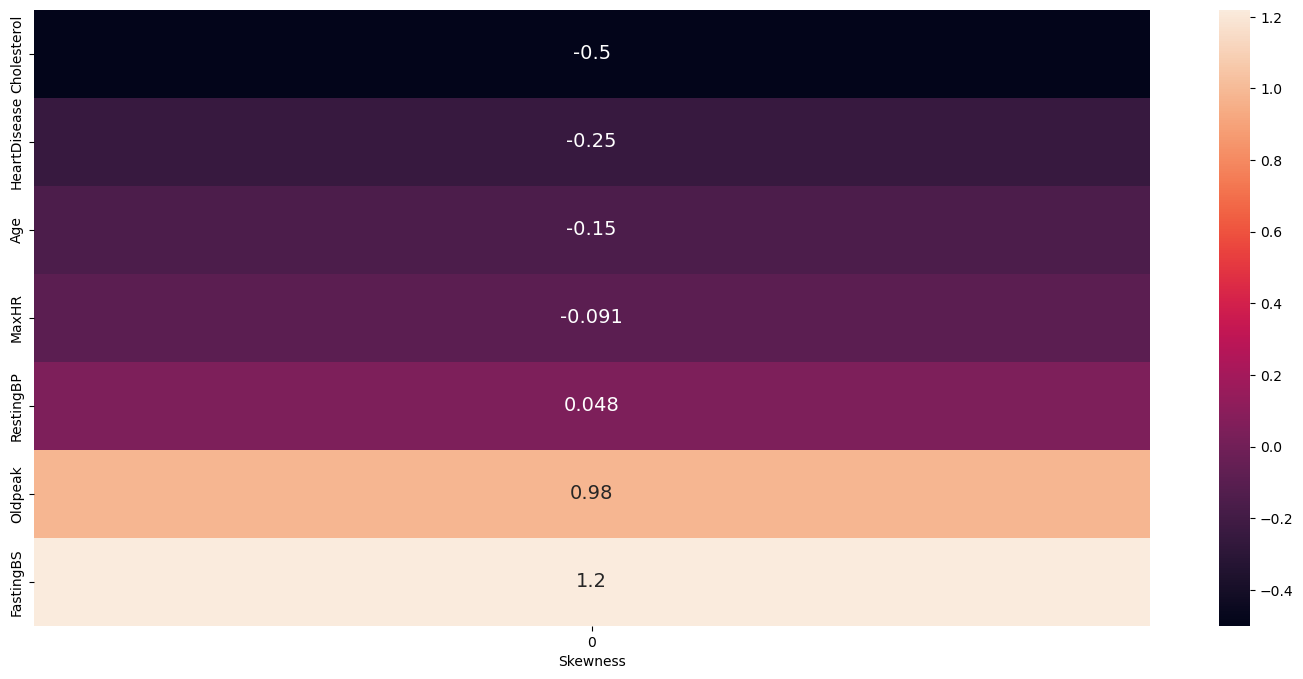

In [44]:
#12 绘制数值特征的偏度
plt.figure(figsize=(18, 8))
sns.heatmap(pd.DataFrame(train_set[num].___12___().sort_values(ascending=True)), annot=True, cbar=True, # 1分
           annot_kws={'fontsize': 14})
plt.xlabel('Skewness')
plt.show()

In [46]:
#13 将目标变量类型转化为字符串
# 定义类别特征
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'] 

# 将目标变量类型转换为字符串
train_set['HeartDisease'] = train_set['HeartDisease'].astype(str)
for feature in categorical_features:
    train_set[feature] = train_set[feature].___13___(str) # 1分

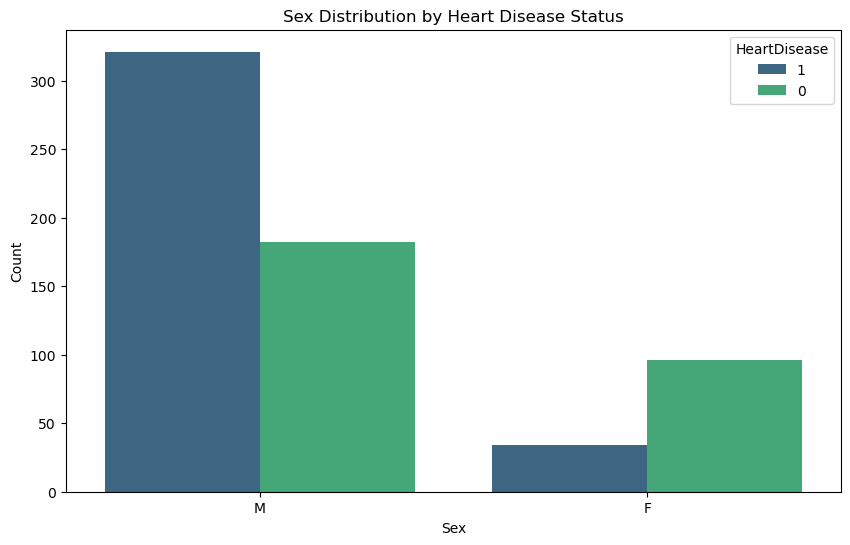

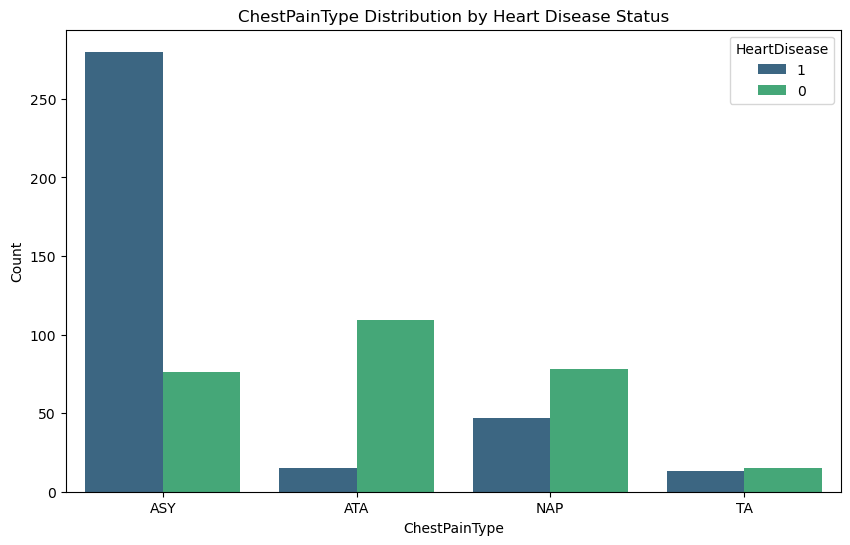

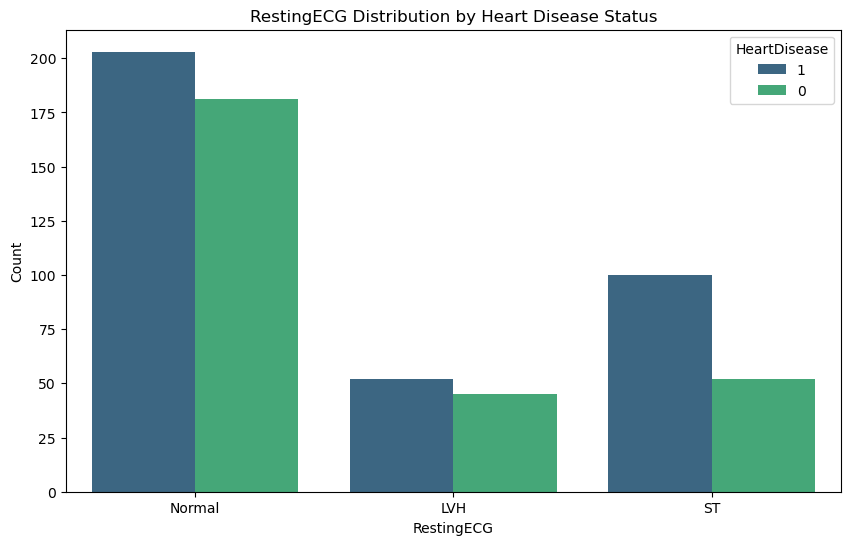

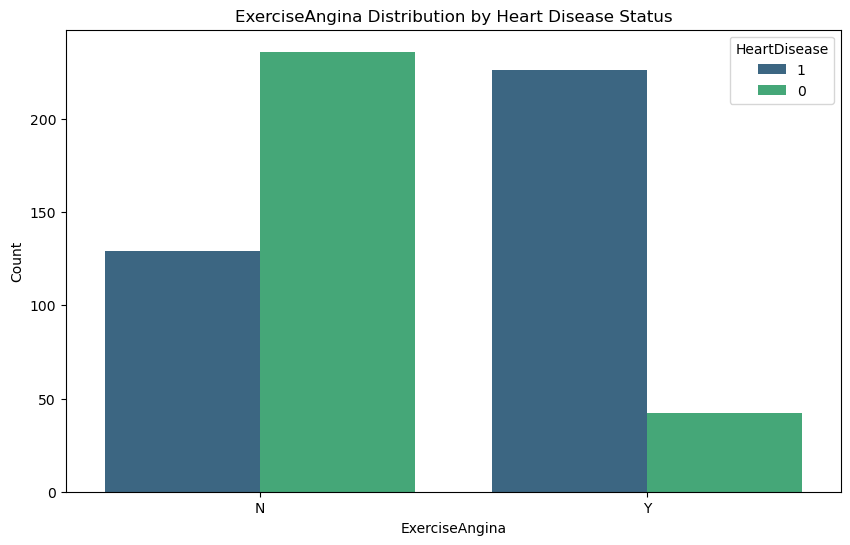

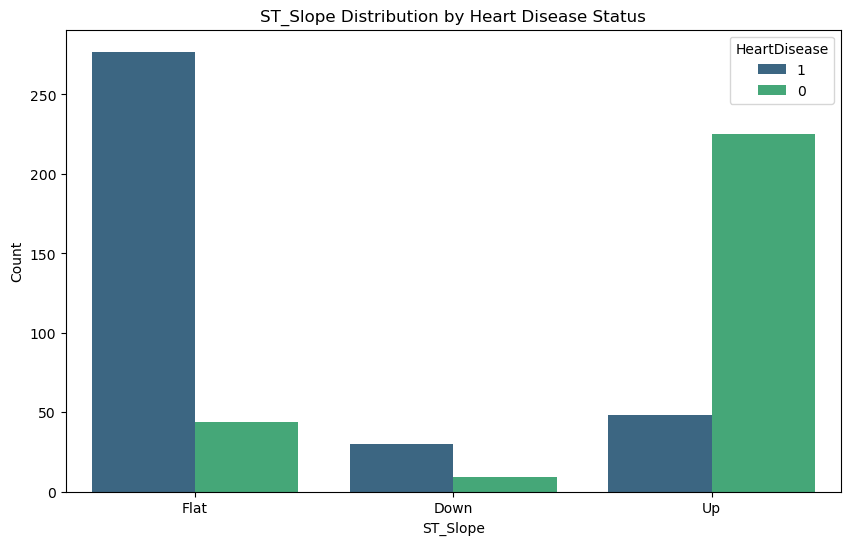

In [47]:
#14 绘制每个类别特征与心脏病状态的关系图
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_set, x=___14___, hue='HeartDisease', palette='viridis') #1分
    plt.title(f'{feature} Distribution by Heart Disease Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [48]:
#构建数据流水线
# 定义数值特征
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
#15 定义数值特征处理流水线
numeric_transformer = ___15___([   # 1分
#16 使用中位数填补缺失值
    ('imputer', SimpleImputer(strategy='___16___')),    # 1分
    ('outlier_remover', RobustScaler()),  # 使用鲁棒缩放器处理离群值
    ('skewness_corrector', PowerTransformer(method='yeo-johnson', standardize=True))  # 使用Yeo-Johnson变换处理偏度
])

# 定义类别特征处理流水线
categorical_transformer = OneHotEncoder(handle_unknown='ignore')  # 使用独热编码处理类别特征

# 将数值和类别特征流水线整合到一起
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features)
    ])

# 构建完整流水线
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

In [49]:
#17 将训练集进行预处理
X_train_transformed = pipeline.___17___(x_train) # 1分
X_test_transformed = pipeline.transform(x_test)

In [50]:
#18 定义分类模型(逻辑回归)
model = ___18___  # 1分

In [51]:
#19 训练模型
# 将预处理器和分类器整合到一起的完整流水线
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ___19___)  # 1分
])

# 训练模型
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('outlier_remover',
                                                                   RobustScaler()),
                                                                  ('skewness_corrector',
                                                                   PowerTransformer())]),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('classifier', LogisticRegression())])

In [52]:
#20 对测试集使用模型进行预测
y_pred = pipeline.___20___(x_test)  # 1分

In [53]:
#21 计算准确率
accuracy = ___21___(y_test, y_pred)  # 1分
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.86


In [54]:
#22 可视化预测结果（打印分类报告）
print(___22___(y_test, y_pred))  # 1分


              precision    recall  f1-score   support

           0       0.83      0.82      0.82        65
           1       0.87      0.88      0.88        94

    accuracy                           0.86       159
   macro avg       0.85      0.85      0.85       159
weighted avg       0.86      0.86      0.86       159

